# Vegetable Sorting Machine 

In [2]:
from PIL import Image  # PIL is a module used inputing image from computer
from matplotlib.pyplot import imshow # Showing image to computer
import numpy as np #  computation
import matplotlib.pyplot as plt # Showing image,can be used to plot data

In [3]:
from os import listdir # listdir returns all the files and directories in the folder 
import tensorflow as tf # for scientific computation
from os.path import isfile, join # used for joining paths of a file or folder 

# Keras: The Python Deep Learning library     
Keras is an opensource library for deeplearning. It is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 

In [4]:
from keras import layers 
from keras.layers import Input,Dropout, Add, Dense, Activation,GlobalAveragePooling2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [5]:
# getting the image from separate folders for training the neural network
def get_image(file_name): 
    im=Image.open(file_name)
    return im.resize((224,224),Image.ANTIALIAS)
def get_image_folder_list(folder_name):
    return [f for f in listdir(folder_name) if isfile(join(folder_name,f))]
def gettin_array(folder):
    image_list=get_image_folder_list(folder)
    m=[]   
    for i in image_list:
        k=np.array(get_image(folder+i))
     
        m.append(k[np.newaxis:,])
    return m

In [6]:
kl = get_image_folder_list("/home/pranav/Desktop/carrot_train")
print(kl)
kl = np.array(get_image("/home/pranav/Desktop/carrot_train/images.jpeg"))
print(kl.shape)
train_carrot = np.array(gettin_array("/home/pranav/Desktop/carrot_train/"))
train_y_carrot = np.zeros((train_carrot.shape[0],1)) # creating y as 1 for training datasets
print(train_y_carrot.shape)

['32464343-single-carrot-isolated.jpg', 'IMG_20181111_145802.jpg', 'IMG_20181111_145822.jpg', '800px_COLOURBOX6094544.jpg', 'IMG_20181111_140917.jpg', 'IMG_20181111_140928.jpg', 'IMG_20181111_140906.jpg', 'IMG_20181111_145838.jpg', 'images.jpeg', 'IMG_20181111_145743.jpg', '14238857-single-carrot.jpg', 'IMG_20181111_145751.jpg', '133458741-1024x1024.jpg', 'IMG_20181111_145814.jpg', 'IMG_20181111_145828.jpg', 'IMG_20181111_140952.jpg', 'IMG_20181111_141012.jpg', 'single-carrot-picture_csp18892772.jpg', 'IMG_20181111_141006.jpg', 'IMG_20181111_145833.jpg', 'IMG_20181111_140943.jpg', 'IMG_20181111_145737.jpg', '6676768-one-single-fresh-carrot-isolated-on-white-background.jpg', 'IMG_20181111_140937.jpg', 'IMG_20181111_140855.jpg', 'IMG_20181111_145808.jpg', '800px_COLOURBOX3339628.jpg']
(224, 224, 3)
(27, 1)


In [7]:
print(train_carrot.shape)
train_cuccumber =  np.array(gettin_array("/home/pranav/Desktop/cuccumber/"))
hjj = get_image_folder_list("/home/pranav/Desktop/cuccumber/") 
train_x = np.concatenate((train_cuccumber,train_carrot),axis=0)
print(train_x.shape)
train_y_cuccumber = np.ones((train_cuccumber.shape[0],1))
print(train_y_cuccumber.shape)

(27, 224, 224, 3)
(42, 224, 224, 3)
(15, 1)


# pre processing y part of program:
In order to train the neural network we need to convert Y part ie, cuccumber as one and carrot as zero.
Then for feeding the full images,concatenate the two classes of images

In [8]:
train_y = np.concatenate((train_y_cuccumber,train_y_carrot),axis = 0)
print(train_y.shape)

(42, 1)


# Inceptionv3 Convolutional Neural Network Architecture:
This is deep neural network of several layers.
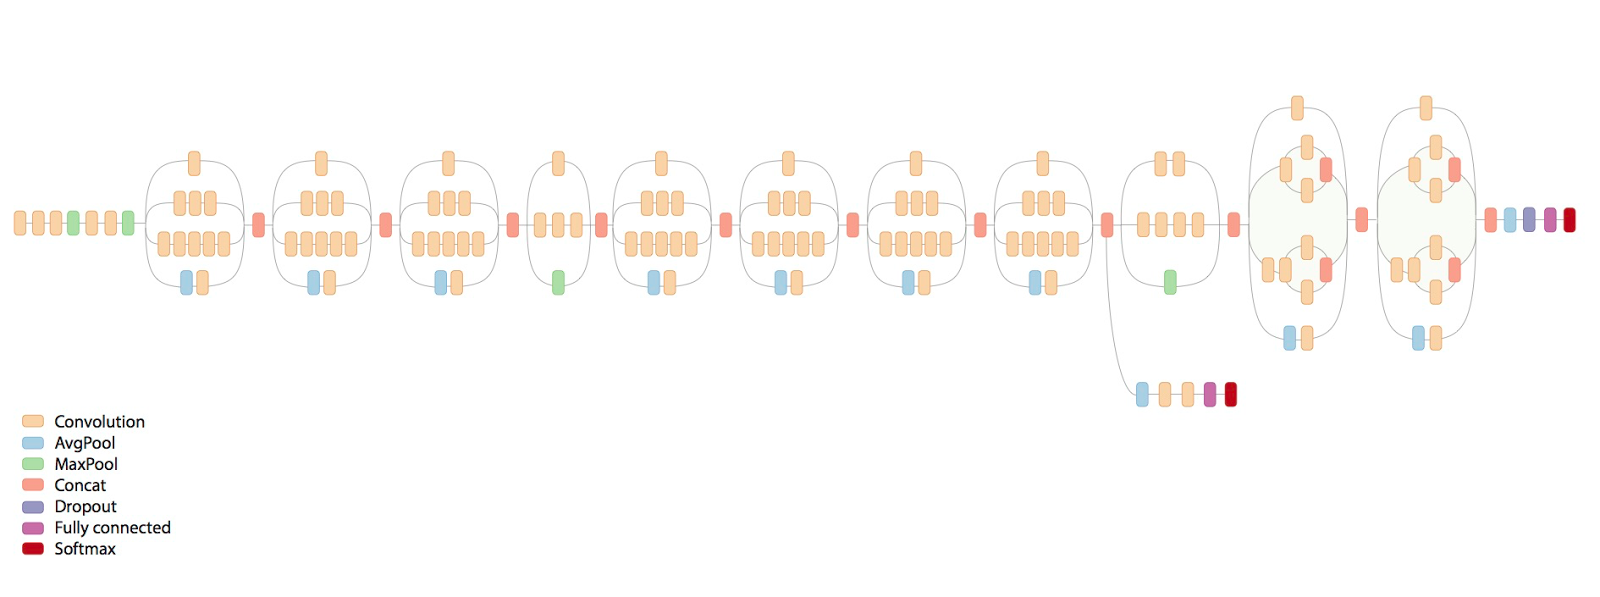
https://arxiv.org/abs/1512.00567



In [9]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [10]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

# Transfer learning:
Since we don't enough computation power making a deeplearning model with several layers it is always a best choice to use some models which was trained on several different classes of images and retrainig it for our own purpose. 

In [11]:
for i,layer in enumerate(base_model.layers):
    print(i,layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [12]:
X = base_model.get_layer('conv2d_85').output

In [13]:
X = GlobalAveragePooling2D()(X)
X = Dense(256,activation='relu')(X)
X = Dense(128,activation='relu')(X)
pred = Dense(1,activation='sigmoid')(X)

In [14]:
model = Model(inputs=base_model.input,outputs=pred)

In [15]:
# training only last 44 layers of this deep neural network
for layer in base_model.layers[:268]:
    layer.trainable = False

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(train_x,train_y,epochs=10,batch_size =10)

Epoch 1/10
42/42 [==============================] - 12s 278ms/step - loss: 0.4971 - acc: 0.7857
Epoch 2/10
42/42 [==============================] - 8s 186ms/step - loss: 0.4784 - acc: 0.7381
Epoch 3/10
42/42 [==============================] - 8s 183ms/step - loss: 0.6114 - acc: 0.7857
Epoch 4/10
42/42 [==============================] - 8s 185ms/step - loss: 0.1686 - acc: 0.9286
Epoch 5/10
42/42 [==============================] - 8s 197ms/step - loss: 0.3106 - acc: 0.8095
Epoch 6/10
42/42 [==============================] - 8s 188ms/step - loss: 0.1493 - acc: 0.9524
Epoch 7/10
42/42 [==============================] - 9s 203ms/step - loss: 0.0933 - acc: 0.9762
Epoch 8/10
42/42 [==============================] - 8s 190ms/step - loss: 0.2451 - acc: 0.8571
Epoch 9/10
42/42 [==============================] - 8s 185ms/step - loss: 0.0424 - acc: 0.9762
Epoch 10/10
42/42 [==============================] - 8s 185ms/step - loss: 0.0187 - acc: 1.0000


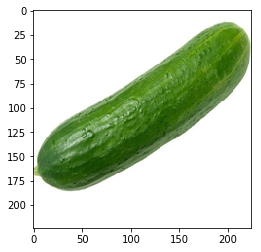

In [51]:
any_im = train_x[np.random.randint(len(train_x))] # taking a random image from the folder and predicting it
plt.imshow(any_im)
x=image.img_to_array(any_im)
x=preprocess_input(x).reshape(1,224,224,3)
prediction=model.predict(x)

In [52]:
# the output is a sigmoid function so,the output which is greater than 0.5  threshold is cuccumber and which is less is carrot
if prediction[0,0]>0.5:
    print('cuccumber')
else:
    print('carrot')

cuccumber


In [164]:
# saving the model to a h5 file inorder run it in rasperrypi
model.save('inceptionv3.h5')